In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import os

def plot_allele_and_well_plate(csv_file, omitted_wells=None, drop=None):
    # Read the CSV file
    data = pd.read_csv(csv_file, skiprows=23)

    data = data[~data['Well Position'].isin(drop)]
    # TODO Add something later to auto detect values out of range and drop them!

    # Extract the file name (without the extension) to use as the plot title
    file_name = os.path.splitext(os.path.basename(csv_file))[0]

    # Define the updated cluster colors and labels in the order WT, HET, HOM
    updated_colors = {'WT': '#ff7f0e', 'HET': '#2ca02c', 'HOM': '#1f77b4'}
# ff7f0e
    # Standardize the data and perform clustering (K-means with 3 clusters)
    X = data[['Allele 1', 'Allele 2']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3)#, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Sort clusters to match the desired order based on the mean values of Allele 1 (ensuring WT, HET, HOM)
    cluster_means = data.groupby('Cluster')['Allele 1'].mean().sort_values()
    cluster_order = {cluster_means.index[2]: 'WT', cluster_means.index[1]: 'HET', cluster_means.index[0]: 'HOM'}
    data['Cluster Label'] = data['Cluster'].map(cluster_order)

    # Set up the figure with two subplots (for Allele plot and 96-well visualization)
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot Allele 1 vs Allele 2
    ax1 = axs[0]
    for index, row in data.iterrows():
        well_pos = row['Well Position']
        # Check if omitted wells are provided and if the well is in the omitted list
        if omitted_wells and well_pos in set(omitted_wells):
            color = 'black'
        else:
            cluster_label = row['Cluster Label']
            color = updated_colors[cluster_label]
        ax1.scatter(row['Allele 1'], row['Allele 2'], color=color)
    
    for i, txt in enumerate(data['Well Position']):
        ax1.annotate(txt, (data['Allele 1'].iloc[i], data['Allele 2'].iloc[i]), fontsize=8)
    
    ax1.set_title(f'{file_name}: Allele Discrimination Plot')
    ax1.set_xlabel('Allele 1')
    ax1.set_ylabel('Allele 2')
    ax1.grid(True)

    # Create the 96-well visualization
    ax2 = axs[1]
    rows = list('ABCDEFGH')
    columns = list(range(1, 13))
    wells_present = set(data['Well Position'])

    for row_label in rows:
        for col_label in columns:
            well_pos = f"{row_label}{col_label}"
            if well_pos in wells_present:
                # Get the cluster information
                row = data[data['Well Position'] == well_pos].iloc[0]
                if omitted_wells and well_pos in set(omitted_wells):
                    color = 'black'
                else:
                    cluster_label = row['Cluster Label']
                    color = updated_colors[cluster_label]
            else:
                color = 'white'  # Empty wells are white

            # Plot the well as a colored rectangle (representing a well)
            ax2.add_patch(mpatches.Rectangle((col_label - 1, rows.index(row_label)), 1, 1, facecolor=color, edgecolor='black'))
    
    ax2.set_xlim(0, 12)
    ax2.set_ylim(0, 8)
    ax2.set_xticks(np.arange(12) + 0.5)
    ax2.set_yticks(np.arange(8) + 0.5)
    ax2.set_xticklabels(columns)
    ax2.set_yticklabels(rows)
    ax2.set_title(f'{file_name}: 96-Well Plate Calls')
    ax2.invert_yaxis()  # Invert y-axis for proper well layout

    # Create legends
    legend_patches = [mpatches.Patch(color=updated_colors[label], label=label) for label in ['WT', 'HET', 'HOM']]
    if omitted_wells:
        legend_patches.append(mpatches.Patch(color='black', label='Omitted'))
    legend_patches.append(mpatches.Patch(color='white', label='Empty'))
    ax2.legend(handles=legend_patches, loc='upper right')

    plt.tight_layout()
    plt.show()

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


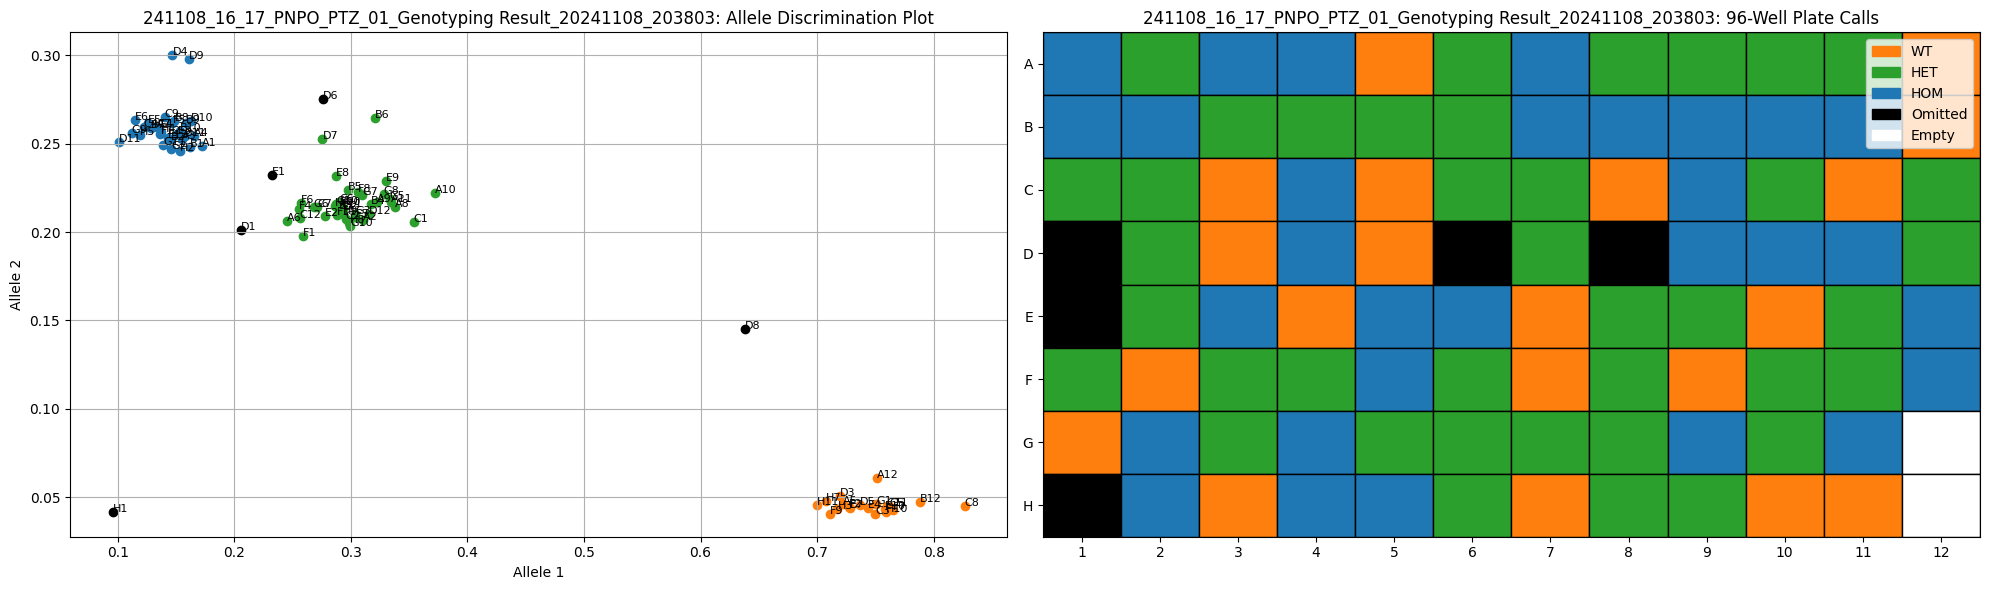

In [19]:
csv_file = 'KASP/241108_16_17_PNPO_PTZ_01_Genotyping Result_20241108_203803.csv'  # Replace with your CSV file pat
omitted_wells = ['D6','D1','E1', 'H1', 'D8']  # Specify omitted wells
plot_allele_and_well_plate(csv_file,omitted_wells)
# plot_allele_and_well_plate(csv_file)

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'B1' 'B2'
 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'B12' 'C1' 'C2' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6'
 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8'
 'E9' 'E10' 'E11' 'E12' 'F1' 'F2' 'F3' 'F4' 'F5' 'F8' 'F9' 'F10' 'F11'
 'F12' 'G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11' 'G12' 'H1'
 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9']


/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


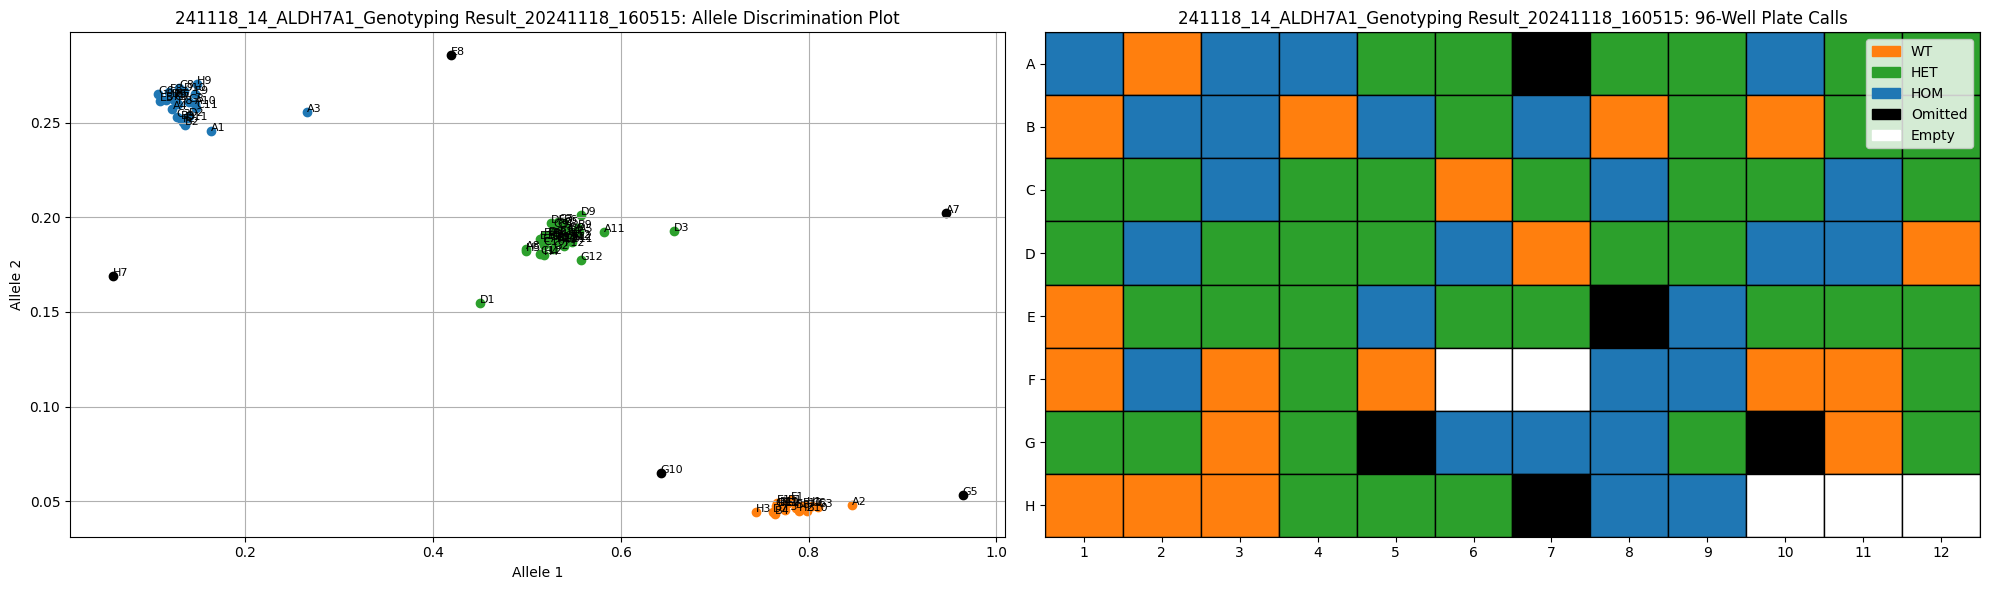

In [36]:
csv_file = 'KASP/241118_14_ALDH7A1_Genotyping Result_20241118_160515.csv'  # Replace with your CSV file pat
omitted_wells = ['H7', 'E8', 'G5', 'G10', 'A7']  # Specify omitted wells
drop = ['F6', 'F7'] #These are empty and skewing results
plot_allele_and_well_plate(csv_file,omitted_wells, drop)
# plot_allele_and_well_plate(csv_file)